In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [16]:
%matplotlib inline

In [17]:
X = pd.read_pickle("./X-2s.pkl")
y = pd.read_pickle("./y-2s.pkl")
espl = pd.read_pickle("./espl.pkl")

### Variabili di riassunto
Sono state calcolate le seguenti variabili di riassunto del segnale, nell'intervallo ampio 2000 ms di osservazione:
1. Integrale del segnale nell'intervallo, calcolato con l'approssimazione per trapezi.
2. Massimo dell'accelerazione nell'intervallo.
3. Variazione media assoluta della derivata nell'intervallo.

Analisi esplorativa con `PCA`, `ICA`, `t-SNE`.

In [18]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

In [19]:
from funzioni import Whiten

In [20]:
# Sbiancamento dei dati
esplWh = Whiten().fit_transform(espl)

In [21]:
pca = PCA(n_components=2, random_state=42)
esplPCA = pca.fit_transform(esplWh)

In [22]:
ica = FastICA(n_components=2, random_state=42)
esplICA = ica.fit_transform(esplWh)

In [23]:
tsne = TSNE(n_components=2, random_state=42)
esplTSNE = tsne.fit_transform(esplWh)

In [24]:
# Funzione che produce lo scatterplot con i colori per i gruppi dati da y
from funzioni import ScatterGroup

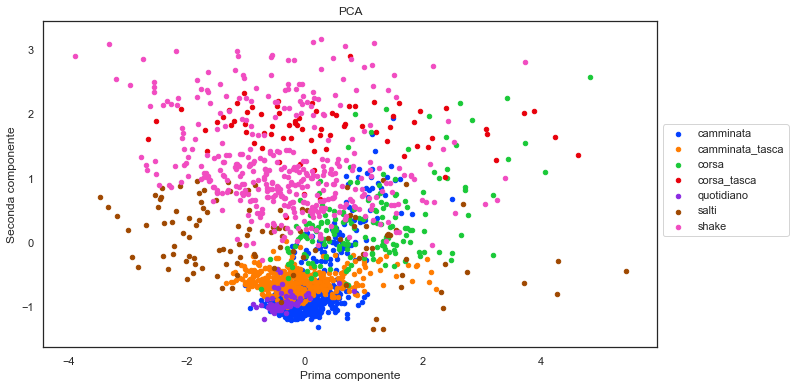

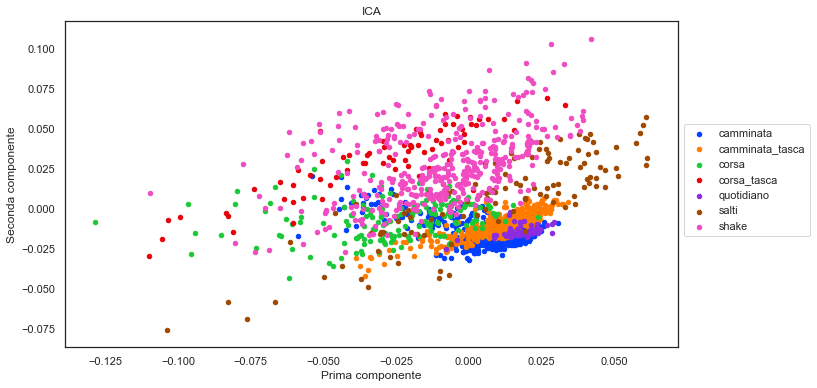

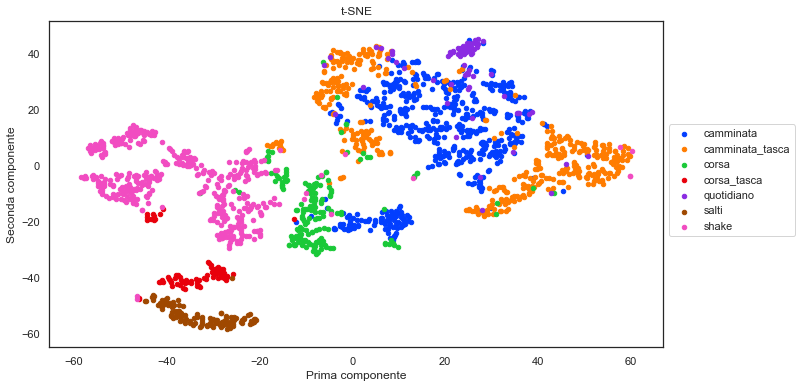

In [25]:
for title,dat in zip(["PCA","ICA","t-SNE"], [esplPCA, esplICA, esplTSNE]):
    fig, ax = ScatterGroup(pd.DataFrame(dat, columns=["Prima componente", "Seconda componente"]),
                       grp=y, palette="bright")
    fig.set_figwidth(11)
    fig.set_figheight(6)
    ax.set_title(title)
    plt.legend(bbox_to_anchor=(1,0.7))
    plt.savefig("./figure/"+title+".png", bbox_inches="tight", dpi=180)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
X_train, X_val, y_train, y_val = train_test_split(espl, y, test_size=0.25, random_state=42)

In [33]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Accuratezza LDA su FT: 82.5%
[[118   2  14   0   0   0   0]
 [ 17  85   0   0   0   0   0]
 [  2   6  25   0   0   0   0]
 [  0   0   0  19   0   1   0]
 [ 16   3   0   0   0   0   0]
 [  0   0   0   0   0  32   0]
 [  1  10   5   2   0   0  93]]


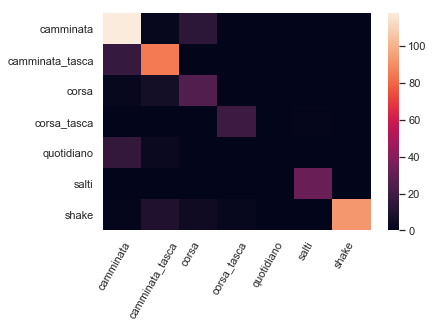

In [37]:
y_pred_lda = lda.predict(X_val)
print("Accuratezza LDA su FT: {:.1f}%".format(100*accuracy_score(y_val, y_pred_lda)))
print(confusion_matrix(y_val, y_pred_lda))
sns.heatmap(confusion_matrix(y_val, y_pred_lda), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.show()

In [38]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

Accuratezza QDA su FT: 91.8%
[[123   2   4   0   4   0   1]
 [  0  93   1   0   4   0   4]
 [  1   1  30   0   0   0   1]
 [  0   0   0  20   0   0   0]
 [  7   5   0   0   7   0   0]
 [  0   0   0   0   0  32   0]
 [  0   0   1   1   0   0 109]]


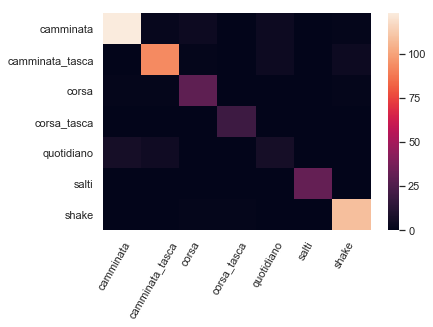

In [39]:
y_pred_qda = qda.predict(X_val)
print("Accuratezza QDA su FT: {:.1f}%".format(100*accuracy_score(y_val, y_pred_qda)))
print(confusion_matrix(y_val, y_pred_qda))
sns.heatmap(confusion_matrix(y_val, y_pred_qda), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.show()